In [1]:
#import sys
#sys.path.append("./venv_multiatt/lib/python3.10/site-packages")

In [12]:
import maddpkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [13]:
seed = 0

## Data

In [14]:
path_to_data = "./data_courseBBB_age_binarized/"
X_train = pd.read_csv(path_to_data + "X_train_stClick_7030.csv")
X_test = pd.read_csv(path_to_data + "X_test_stClick_7030.csv")
y_train = pd.read_csv(path_to_data + "y_train_stClick_7030.csv").values.ravel()
y_test = pd.read_csv(path_to_data + "y_test_stClick_7030.csv").values.ravel()

In [15]:
print(X_train.shape)
print(X_test.shape)

(3709, 8)
(1590, 8)


In [16]:
X_test.columns

Index(['gender', 'highest_education', 'poverty', 'age', 'disability',
       'num_of_prev_attempts', 'studied_credits', 'sum_click'],
      dtype='object')

In [17]:
print(X_test["age"].unique())
print(X_test["disability"].unique())
print(X_test["gender"].unique())
print(X_test["poverty"].unique())

[1 0]
[0. 1.]
[0. 1.]
[1. 0.]


## Model learning

In [19]:
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
print(accuracy_score(y_test, model.predict(X_test)))
print(len(y_test[y_test == 1]) / len(y_test))

0.7081761006289308
0.6981132075471698


## Evaluation

In [27]:
nb_sf = 4
sf = ["gender", "poverty", "disability", "age"]
rez = dict()

In [28]:
sf_detailed = list()

for sf_name in sf:
    sf_detailed.append(sf_name+"1")
    sf_detailed.append(sf_name+"0")
    
print(sf_detailed)

['gender1', 'gender0', 'poverty1', 'poverty0', 'disability1', 'disability0', 'age1', 'age0']


In [29]:
from itertools import combinations

combi_all = list(combinations(sf_detailed, 4))
combi = list()

for elem in combi_all:
    count_identical = 0
    for i in range(len(elem) - 1):
        if elem[i][:3] == elem[i+1][:3]:
            count_identical += 1
    if count_identical == 0:
        combi.append(elem)

print(combi)
print("Length:", len(combi))

[('gender1', 'poverty1', 'disability1', 'age1'), ('gender1', 'poverty1', 'disability1', 'age0'), ('gender1', 'poverty1', 'disability0', 'age1'), ('gender1', 'poverty1', 'disability0', 'age0'), ('gender1', 'poverty0', 'disability1', 'age1'), ('gender1', 'poverty0', 'disability1', 'age0'), ('gender1', 'poverty0', 'disability0', 'age1'), ('gender1', 'poverty0', 'disability0', 'age0'), ('gender0', 'poverty1', 'disability1', 'age1'), ('gender0', 'poverty1', 'disability1', 'age0'), ('gender0', 'poverty1', 'disability0', 'age1'), ('gender0', 'poverty1', 'disability0', 'age0'), ('gender0', 'poverty0', 'disability1', 'age1'), ('gender0', 'poverty0', 'disability1', 'age0'), ('gender0', 'poverty0', 'disability0', 'age1'), ('gender0', 'poverty0', 'disability0', 'age0')]
Length: 16


In [30]:
combi

[('gender1', 'poverty1', 'disability1', 'age1'),
 ('gender1', 'poverty1', 'disability1', 'age0'),
 ('gender1', 'poverty1', 'disability0', 'age1'),
 ('gender1', 'poverty1', 'disability0', 'age0'),
 ('gender1', 'poverty0', 'disability1', 'age1'),
 ('gender1', 'poverty0', 'disability1', 'age0'),
 ('gender1', 'poverty0', 'disability0', 'age1'),
 ('gender1', 'poverty0', 'disability0', 'age0'),
 ('gender0', 'poverty1', 'disability1', 'age1'),
 ('gender0', 'poverty1', 'disability1', 'age0'),
 ('gender0', 'poverty1', 'disability0', 'age1'),
 ('gender0', 'poverty1', 'disability0', 'age0'),
 ('gender0', 'poverty0', 'disability1', 'age1'),
 ('gender0', 'poverty0', 'disability1', 'age0'),
 ('gender0', 'poverty0', 'disability0', 'age1'),
 ('gender0', 'poverty0', 'disability0', 'age0')]

In [31]:
for i in range(len(combi)): # 16

    x_ = X_test.copy()

    for j in range(len(combi[i])): # 4
        
        elem = combi[i][j]
        
        num = int(elem[-1])
        sf_name = elem[:-1]
        
        x_ = x_[x_[sf_name] == num]
        
    # calcul des index, madd et accuracy
    y_test_ = y_test[x_.index]
    y_pred_ = model.predict(x_)
    acc = accuracy_score(y_test_, y_pred_) # for this group
    
    y_pp_group = model.predict_proba(x_)[:, 1] 
    y_pp_rest = model.predict_proba(X_test[~X_test.index.isin(x_.index)])[:, 1] 
    madd = maddpkg.MADD(h="auto", pred_proba_sf0=np.array(y_pp_group), pred_proba_sf1=np.array(y_pp_rest)) # for this group vs. the rest
    
    rez[combi[i]] = {"madd": madd, "accuracy": acc}
    
print(rez)

{('gender1', 'poverty1', 'disability1', 'age1'): {'madd': 1.4240705734089478, 'accuracy': 0.3333333333333333}, ('gender1', 'poverty1', 'disability1', 'age0'): {'madd': 0.6253164556962025, 'accuracy': 0.7}, ('gender1', 'poverty1', 'disability0', 'age1'): {'madd': 0.3426437727860755, 'accuracy': 0.5}, ('gender1', 'poverty1', 'disability0', 'age0'): {'madd': 0.059390803245913254, 'accuracy': 0.6363636363636364}, ('gender1', 'poverty0', 'disability1', 'age1'): {'madd': 0.631843926998112, 'accuracy': 1.0}, ('gender1', 'poverty0', 'disability1', 'age0'): {'madd': 0.35835962145110406, 'accuracy': 0.8}, ('gender1', 'poverty0', 'disability0', 'age1'): {'madd': 0.07606798346348187, 'accuracy': 0.7428571428571429}, ('gender1', 'poverty0', 'disability0', 'age0'): {'madd': 0.01540632717864289, 'accuracy': 0.6818181818181818}, ('gender0', 'poverty1', 'disability1', 'age1'): {'madd': 0.594260175050177, 'accuracy': 0.4838709677419355}, ('gender0', 'poverty1', 'disability1', 'age0'): {'madd': 0.2626459

## Visualisation

In [32]:
madds = list()
accs = list()

for key in rez:
    madds.append(rez[key]["madd"])
    accs.append(rez[key]["accuracy"])

In [33]:
list(rez.keys())

[('gender1', 'poverty1', 'disability1', 'age1'),
 ('gender1', 'poverty1', 'disability1', 'age0'),
 ('gender1', 'poverty1', 'disability0', 'age1'),
 ('gender1', 'poverty1', 'disability0', 'age0'),
 ('gender1', 'poverty0', 'disability1', 'age1'),
 ('gender1', 'poverty0', 'disability1', 'age0'),
 ('gender1', 'poverty0', 'disability0', 'age1'),
 ('gender1', 'poverty0', 'disability0', 'age0'),
 ('gender0', 'poverty1', 'disability1', 'age1'),
 ('gender0', 'poverty1', 'disability1', 'age0'),
 ('gender0', 'poverty1', 'disability0', 'age1'),
 ('gender0', 'poverty1', 'disability0', 'age0'),
 ('gender0', 'poverty0', 'disability1', 'age1'),
 ('gender0', 'poverty0', 'disability1', 'age0'),
 ('gender0', 'poverty0', 'disability0', 'age1'),
 ('gender0', 'poverty0', 'disability0', 'age0')]

(0.0, 2.0)

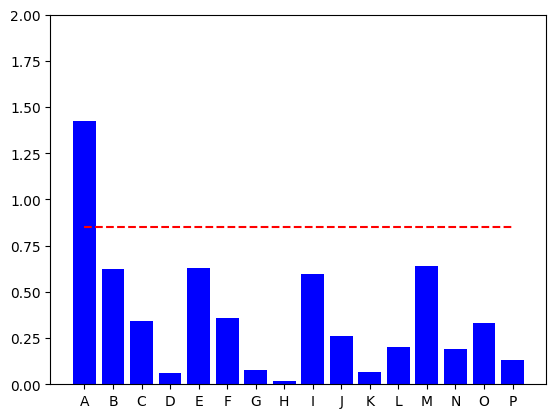

In [52]:
x = [chr(code) for code in range(65, 65+16)]
plt.bar(x, np.array(madds), color="blue", label="MADD")
plt.plot(x, [0.85 for i in range(16)], "--", color="red")
plt.ylim([0, 2])

In [36]:
list(rez.keys())[8]

('gender0', 'poverty1', 'disability1', 'age1')

In [23]:
list(rez.keys())[4]

('gender1', 'imd_band0', 'disability1', 'age_band1')

In [31]:
y_pp0 = model.predict_proba(X_test[X_test["gender"] == 0])[:, 1]
y_pp1 = model.predict_proba(X_test[X_test["gender"] == 1])[:, 1]
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp0, pred_proba_sf1=y_pp1))

y_pp0 = model.predict_proba(X_test[X_test["disability"] == 0])[:, 1]
y_pp1 = model.predict_proba(X_test[X_test["disability"] == 1])[:, 1]
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp0, pred_proba_sf1=y_pp1))

y_pp0 = model.predict_proba(X_test[X_test["imd_band"] == 0])[:, 1]
y_pp1 = model.predict_proba(X_test[X_test["imd_band"] == 1])[:, 1]
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp0, pred_proba_sf1=y_pp1))

y_pp0 = model.predict_proba(X_test[X_test["age_band"] == 0])[:, 1]
y_pp1 = model.predict_proba(X_test[X_test["age_band"] == 1])[:, 1]
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp0, pred_proba_sf1=y_pp1))

0.3871118703841608
0.3055088341465988
0.47733297522325924
0.3474769836249912
